# Fetal Health Classification using XGBoost with Grid Search 

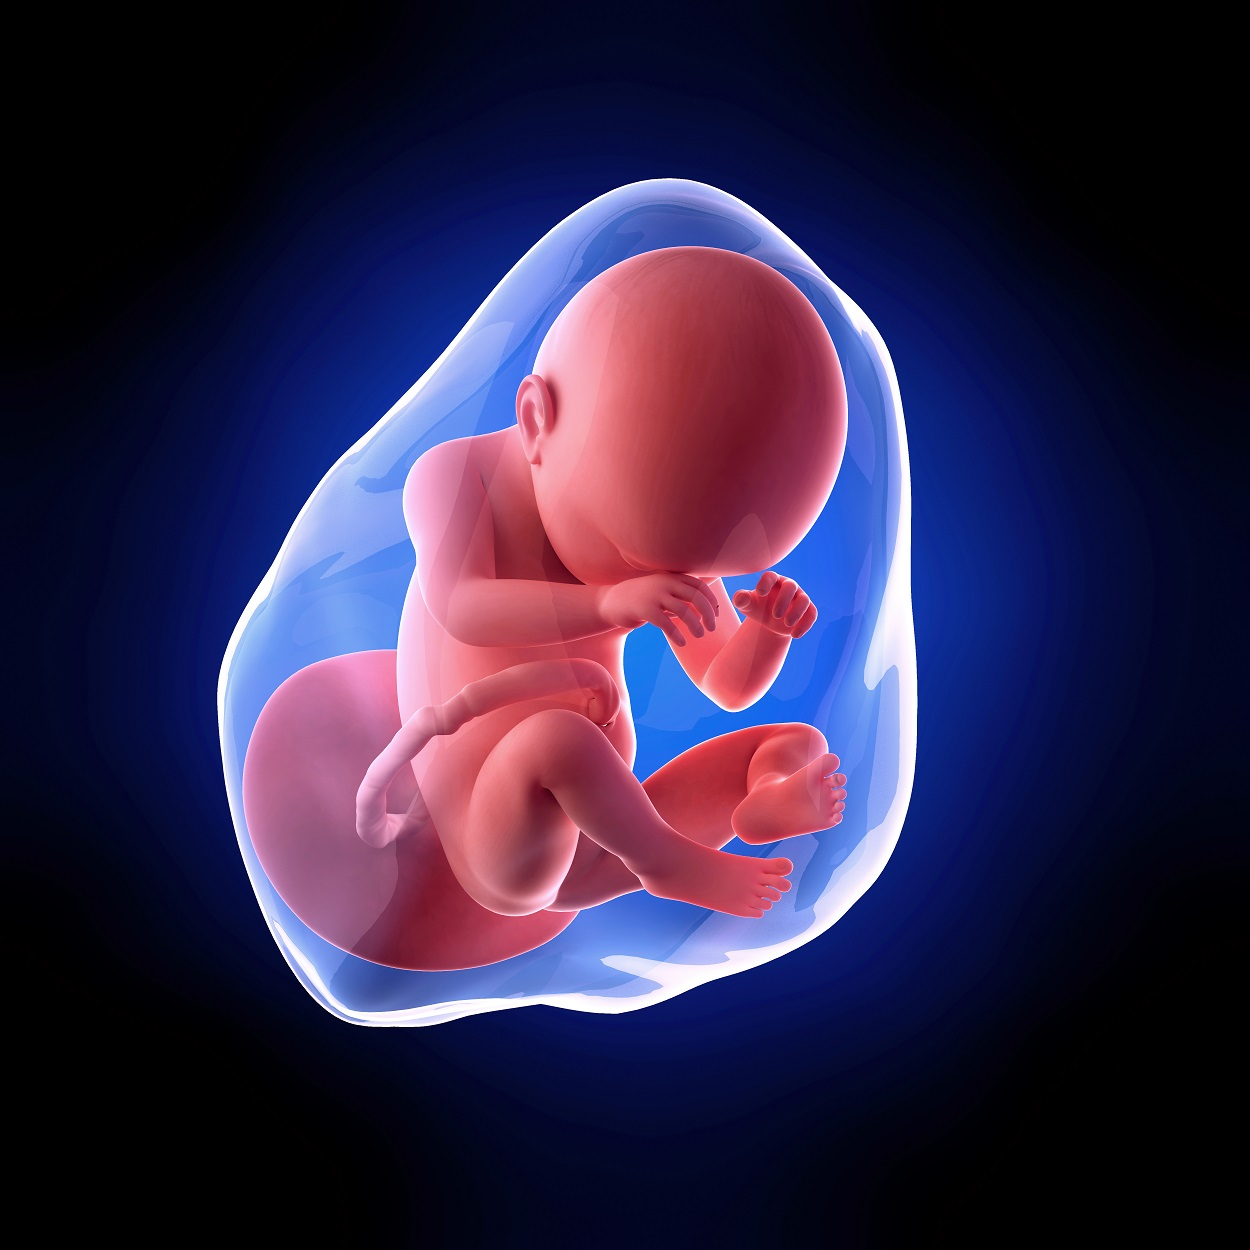

In [163]:
from IPython.display import Image
Image(filename = "A.jpeg",height = 100, width= 800)

In [46]:
import numpy as np 
import pandas as pd 
import missingno as m
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
dff = pd.read_csv('fetal_health.csv')
dff.head().style.background_gradient(cmap="RdYlBu")

In [48]:
dff.shape

(2126, 22)

In [49]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [50]:
dff.describe().style.background_gradient(cmap="magma")

# Data Preprocessing 

In [51]:
dff.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

<AxesSubplot:>

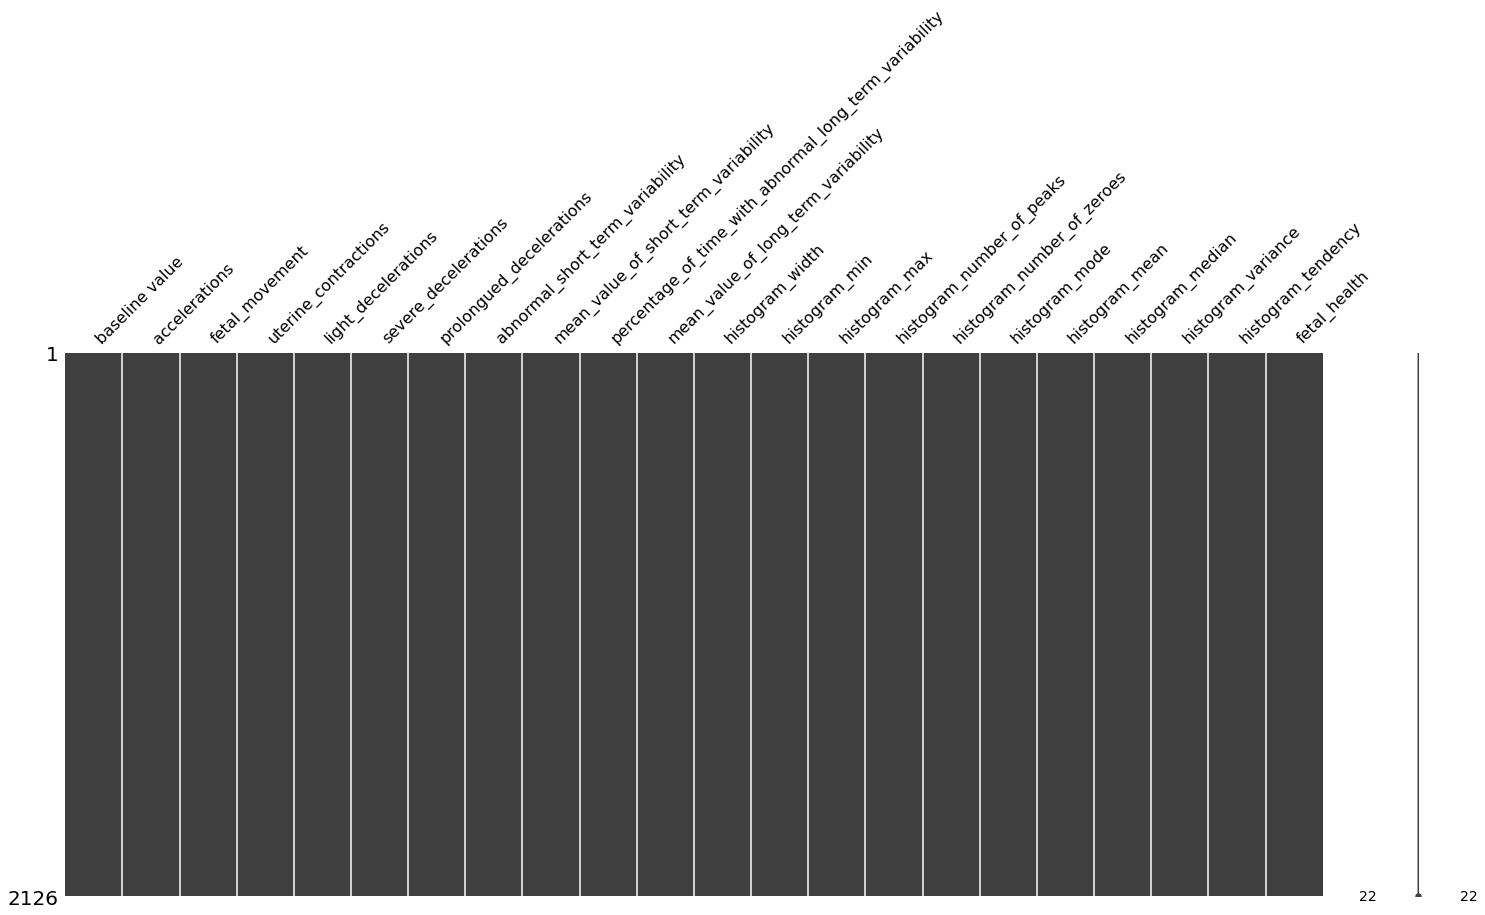

In [52]:
m.matrix(dff)

In [53]:
df = dff.drop_duplicates()
df.shape

(2113, 22)

In [75]:
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [102]:
df['fetal_health'].unique()

array([2., 1., 3.])

# Data Analysis

In [76]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

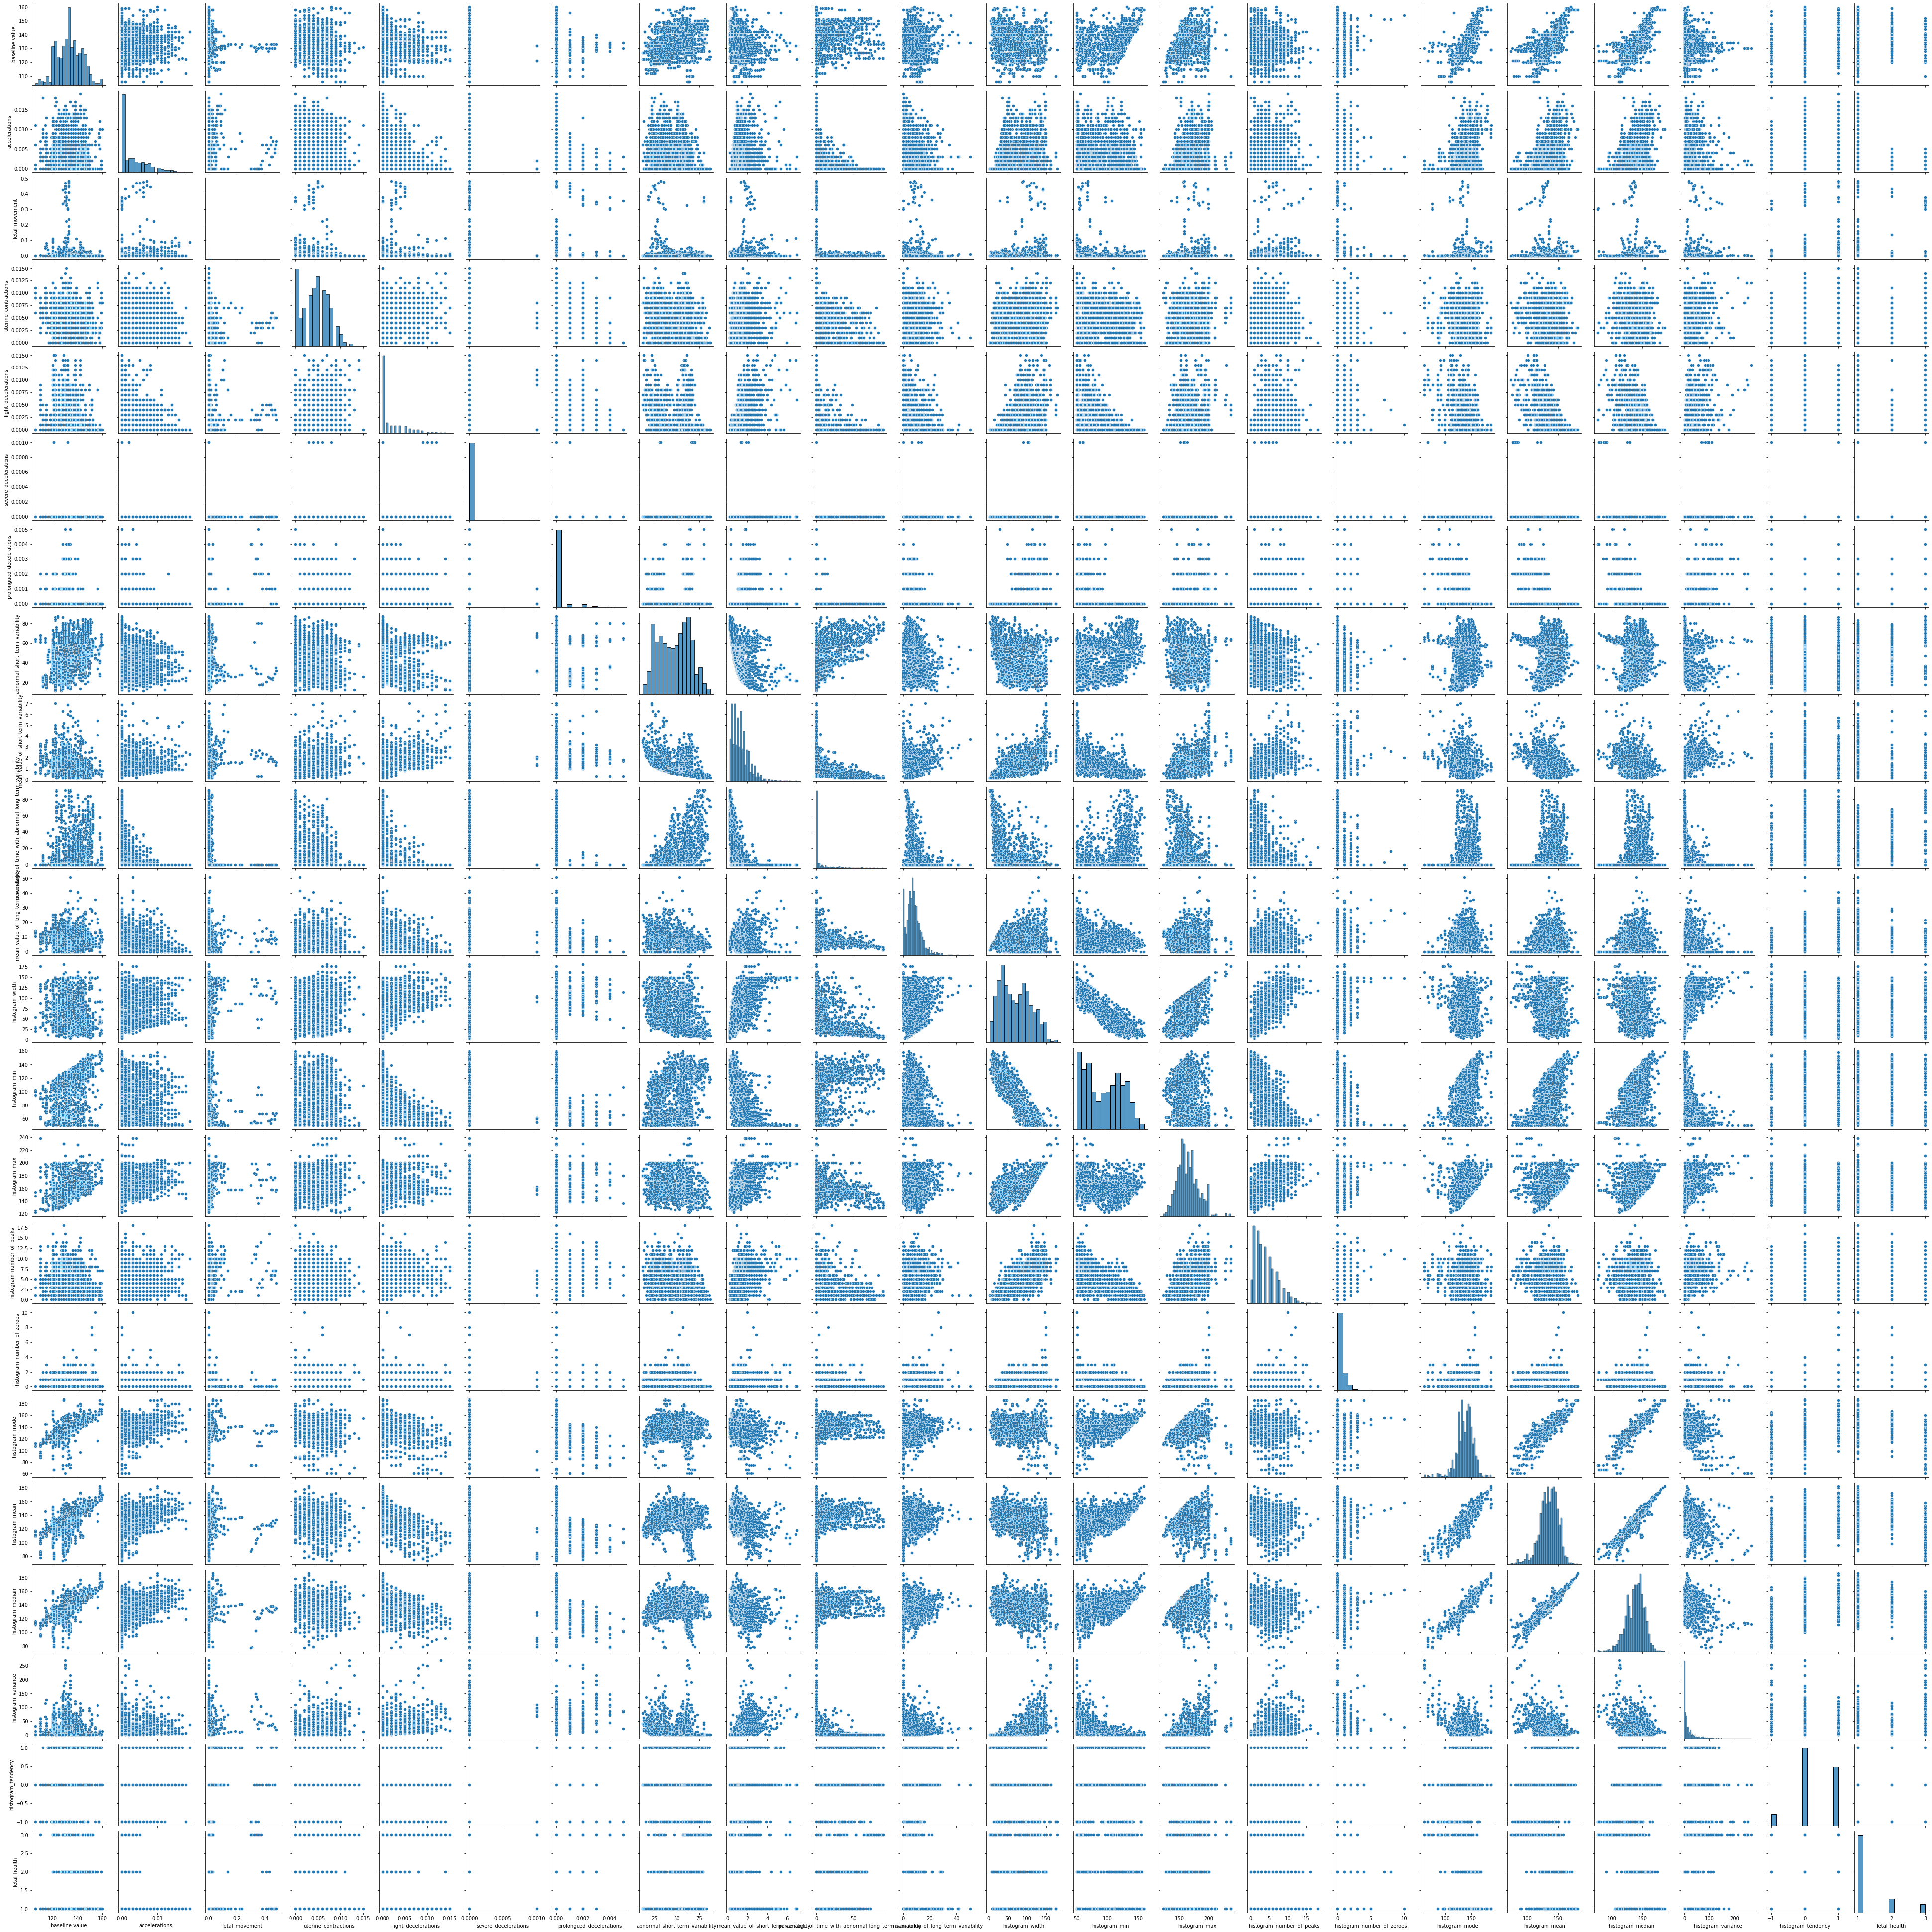

In [137]:
sns.pairplot(df)

[]

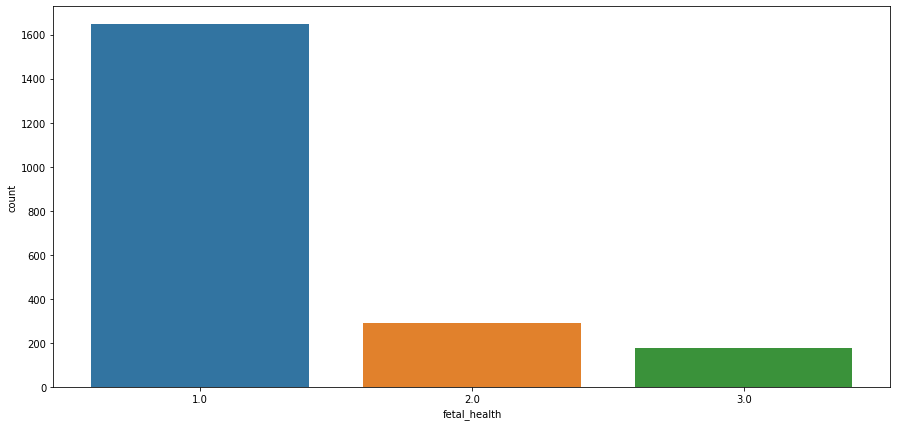

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(15,7))
fig = sns.countplot(x="fetal_health", data=df)
fig.plot()

In [117]:
fig = px.violin(df, x='mean_value_of_short_term_variability',box=True,points='all')
fig.show()

In [155]:
import plotly.figure_factory as ff

hist_data = [df['histogram_mode']]
group_labels = ['distplot'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels)
fig.show()

In [115]:
fig = px.violin(df, x='percentage_of_time_with_abnormal_long_term_variability',box=True,points='all')
fig.show()

In [110]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(x=df['histogram_min']))
fig.add_trace(go.Histogram(x=df['histogram_max']))


# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [116]:
fig = px.violin(df, x='mean_value_of_long_term_variability',box=True,points='all')
fig.show()

In [96]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=df['histogram_number_of_peaks']))
# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [95]:
fig = go.Figure()


fig.add_trace(go.Histogram(x=df['histogram_tendency']))
fig.add_trace(go.Histogram(x=df['histogram_number_of_zeroes']))
fig.add_trace(go.Histogram(x=df['histogram_variance']))
# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [124]:
fig = px.scatter(df,x='fetal_movement', y='uterine_contractions' ,color='fetal_health')
fig.show()

In [94]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=df['histogram_mode']))
fig.add_trace(go.Histogram(x=df['histogram_mean']))
fig.add_trace(go.Histogram(x=df['histogram_median']))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [132]:
fig = px.scatter(df, x='prolongued_decelerations', y="uterine_contractions", color="fetal_health")
fig.show()

In [135]:
fig = px.scatter(df,x='percentage_of_time_with_abnormal_long_term_variability'
                 , y='mean_value_of_short_term_variability', color='fetal_health', marginal_y="violin",
           marginal_x="box", template="simple_white")
fig.show()

In [119]:
fig = px.scatter_3d(df, x='accelerations', y='fetal_movement', z='uterine_contractions', size='light_decelerations', color='fetal_health',
                    hover_data=['severe_decelerations'])
fig.update_layout(scene_zaxis_type="log")
fig.show()


In [122]:
fig = px.scatter_3d(df, x='uterine_contractions', y='percentage_of_time_with_abnormal_long_term_variability', z='fetal_movement',
              color='fetal_health')
fig.show()


In [ ]:
'prolongued_decelerations'

# Heatmap

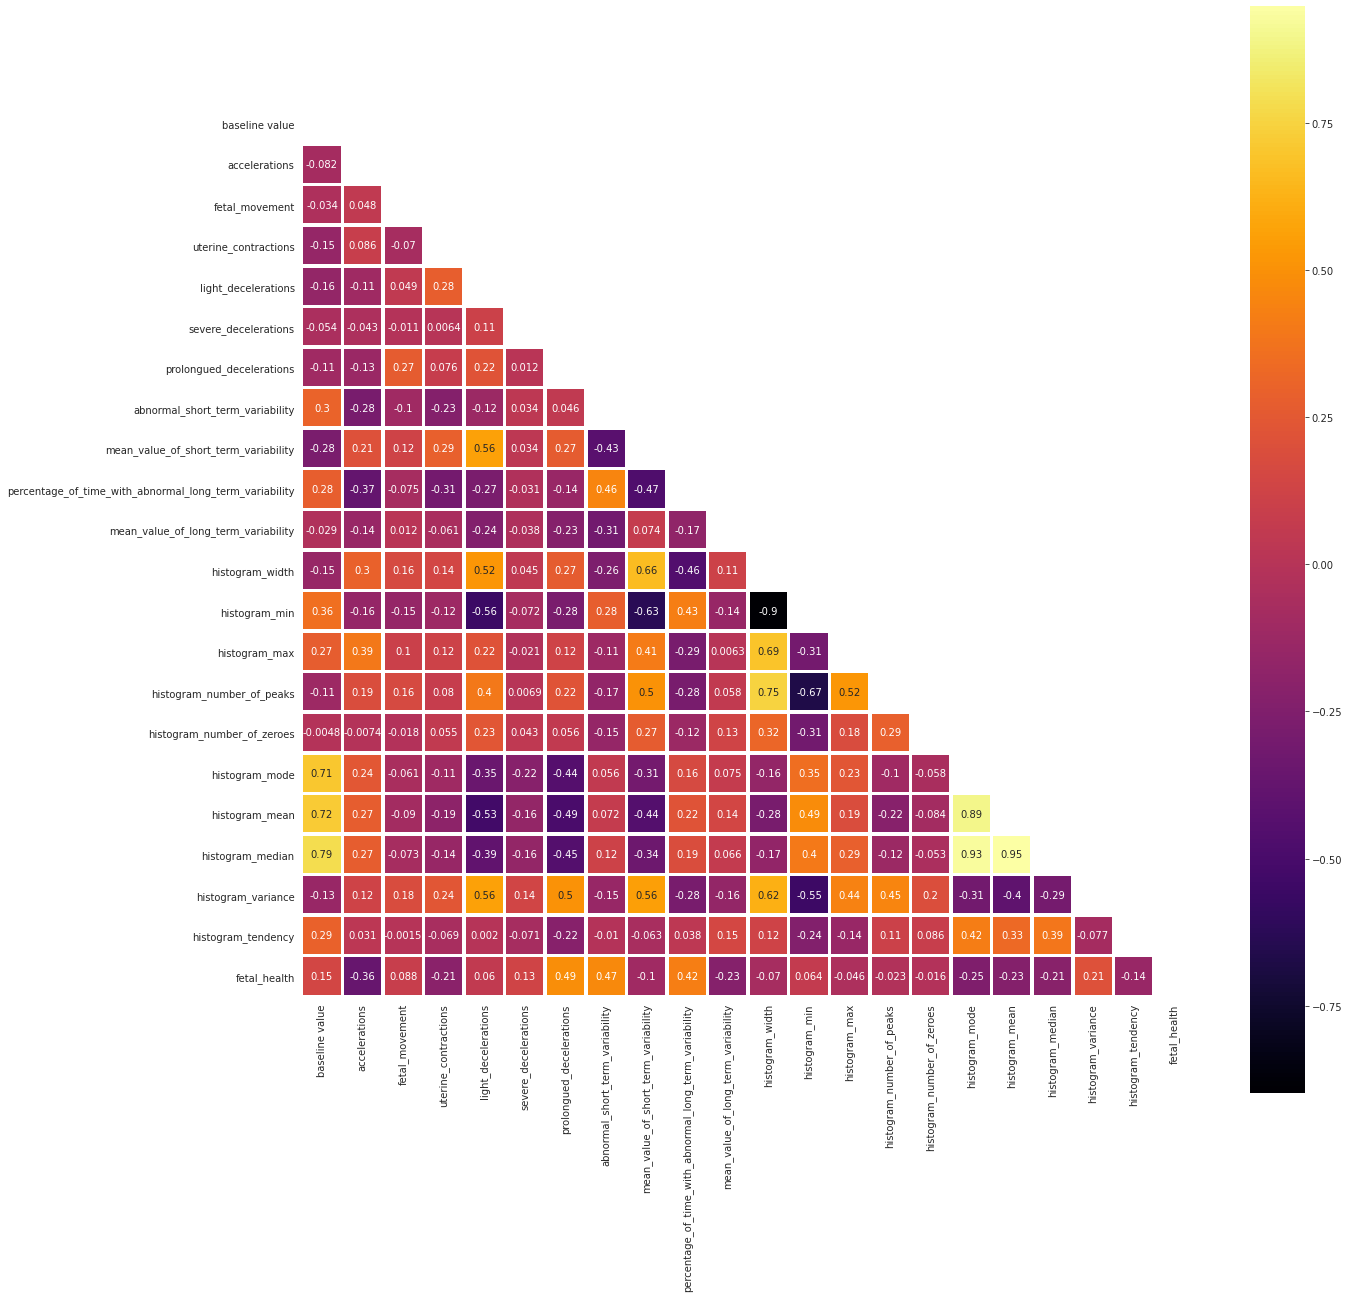

In [54]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=2.5,cmap="inferno",annot=True)

In [55]:
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

# X nad y Split

In [56]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [57]:
X.shape

(2113, 21)

In [58]:
y.shape

(2113,)

# Train Test Split

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling 

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# XGBoost implementation

In [61]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [62]:
model_xgb = xgb.XGBClassifier(
    random_state=42, verbosity = 0
)
parameters = {
    'max_depth': [3, 5, 7, 9], 
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Applying Grid Search 

In [63]:
model_xgb = GridSearchCV(
    model_xgb, 
    parameters, 
    cv=10,
    scoring='accuracy',
)

# Prediction

In [ ]:
model_xgb.fit(X_train, y_train)
model_xgb_pred = model_xgb.predict(X_test)

In [65]:
data = np.concatenate((model_xgb_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(data)

[[1. 1.]
 [1. 1.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]


# Confusion Matrix

In [139]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[410  13   1]
 [ 15  46   1]
 [  1   7  35]]


<AxesSubplot:>

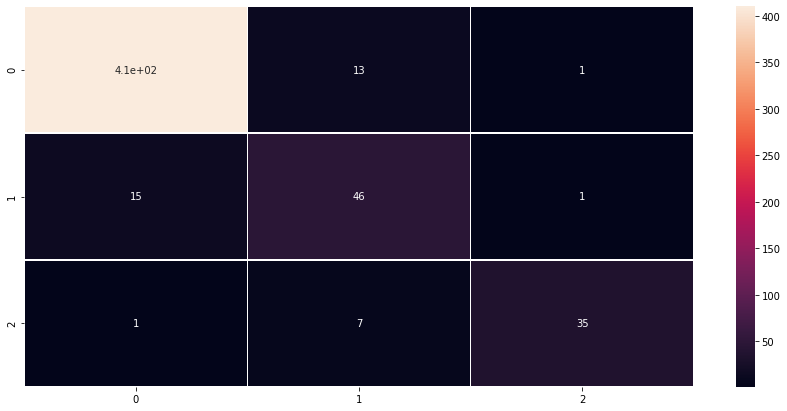

In [156]:
plt.subplots(figsize=(15,7))
sns.heatmap(cm,annot=True,
            linewidths=.5)

# Accuracy

In [144]:
a = accuracy_score(y_test, model_xgb_pred)
a = np.around(a, decimals=2, out=None)
a = a*100
print(f"Accuracy : {a}%")

Accuracy : 96.0%


In [67]:
from sklearn.metrics import classification_report
print(classification_report(model_xgb_pred, y_test))

              precision    recall  f1-score   support

         1.0       0.98      0.98      0.98       424
         2.0       0.84      0.83      0.83        63
         3.0       0.93      0.95      0.94        42

    accuracy                           0.96       529
   macro avg       0.92      0.92      0.92       529
weighted avg       0.96      0.96      0.96       529



# Prediction for a new data 

In [68]:
print(model_xgb.predict(sc.transform([[132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,
                                        130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0]])))

[1.]


In [69]:
print(model_xgb.predict(sc.transform([[134.0,0.001,0.0,0.013,0.008,0.0,0.003,29.0,6.3,0.0,0.0,
                                        150.0,50.0,200.0,6.0,3.0,71.0,107.0,106.0,215.0,0.0]])))

[3.]


In [70]:
dataset = pd.DataFrame({'y_test': data[:, 0], 'y_pred': data[:, 1]})
dataset.to_csv('accuracy.csv')

In [71]:
dataset = pd.read_csv('accuracy.csv')

In [72]:
dataset

Unnamed: 0  y_test  y_pred
0             0     1.0     1.0
1             1     1.0     1.0
2             2     1.0     1.0
3             3     2.0     2.0
4             4     1.0     1.0
..          ...     ...     ...
524         524     1.0     1.0
525         525     3.0     1.0
526         526     1.0     1.0
527         527     1.0     1.0
528         528     1.0     1.0

[529 rows x 3 columns]

# Predicted vs Actual Value Plot 

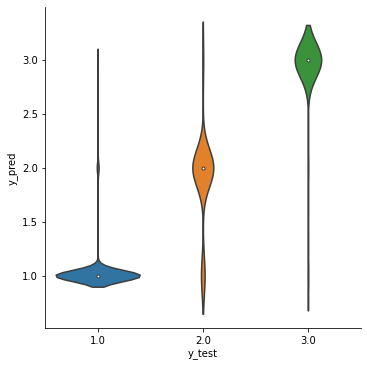

In [147]:
sns.catplot(x="y_test", y="y_pred" ,kind="violin", data=dataset)

# This Model can Successfully Predict Fetal Health with an Accuracy of 96%